# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [19]:
# if you are using google colab
from google.colab import files
uploaded = files.upload()

Saving daily-minimum-temperatures-in-me.csv to daily-minimum-temperatures-in-me (1).csv


In [16]:
uploaded

{'international-airline-passengers.csv': b'Month,Passengers\r\n1949-01,112\r\n1949-02,118\r\n1949-03,132\r\n1949-04,129\r\n1949-05,121\r\n1949-06,135\r\n1949-07,148\r\n1949-08,148\r\n1949-09,136\r\n1949-10,119\r\n1949-11,104\r\n1949-12,118\r\n1950-01,115\r\n1950-02,126\r\n1950-03,141\r\n1950-04,135\r\n1950-05,125\r\n1950-06,149\r\n1950-07,170\r\n1950-08,170\r\n1950-09,158\r\n1950-10,133\r\n1950-11,114\r\n1950-12,140\r\n1951-01,145\r\n1951-02,150\r\n1951-03,178\r\n1951-04,163\r\n1951-05,172\r\n1951-06,178\r\n1951-07,199\r\n1951-08,199\r\n1951-09,184\r\n1951-10,162\r\n1951-11,146\r\n1951-12,166\r\n1952-01,171\r\n1952-02,180\r\n1952-03,193\r\n1952-04,181\r\n1952-05,183\r\n1952-06,218\r\n1952-07,230\r\n1952-08,242\r\n1952-09,209\r\n1952-10,191\r\n1952-11,172\r\n1952-12,194\r\n1953-01,196\r\n1953-02,196\r\n1953-03,236\r\n1953-04,235\r\n1953-05,229\r\n1953-06,243\r\n1953-07,264\r\n1953-08,272\r\n1953-09,237\r\n1953-10,211\r\n1953-11,180\r\n1953-12,201\r\n1954-01,204\r\n1954-02,188\r\n1954-03

In [0]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['daily-minimum-temperatures-in-me.csv']))

### Print the data
- First 5 rows only

In [166]:
# Data Cleansing
columns_to_keep = ['Temperature']
df = df[columns_to_keep]
df['Temperature'] = df['Temperature']
df.index.names = ['Date']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 3650


,Temperature
Date,
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [167]:
df.head()

,Temperature
Date,
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [0]:
#done in previous step

## Question 2

### Check the total count of null values in the data

In [168]:
df.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [0]:
#no null values

## Question 3

### Describe your dataframe
- use describe() method

In [169]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

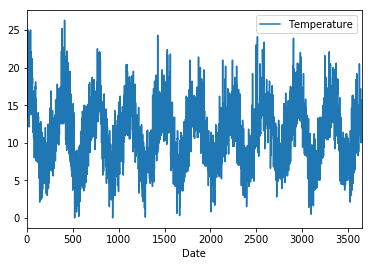

In [170]:
df.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26515dccf8>]],
      dtype=object)

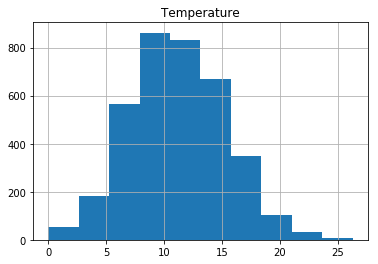

In [171]:
df.hist(bins=10)

### Check minimum and maximum temperature
- use min() and max() methods

In [172]:
# Scaled Data
print('Min', np.min(df))


Min Temperature    0.0
dtype: float64


In [173]:
print('Max', np.max(df))

Max Temperature    26.3
dtype: float64


## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [0]:
#dataset = df.astype('float32')

In [0]:
dt = dataset.values
dt = dt.astype('float32')
train_size = int(len(dt) * 0.75)
train_dataset = dt[0:train_size,:]

In [175]:
test_size = len(dt - train_size)
test_dataset =  dt[train_size: len(dt), :]
print('train: {}\ntest: {}'.format(len(train_dataset), len(test_dataset)))

train: 2737
test: 913


### Normalize the data  
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
#done in question 5 since scaling is done after train test split

### Print scaled train and test data
- print only first 5 values

In [0]:
#done in question 5

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
#import numpy as np
#def create_seq_data(data, lookback=1):
 # X, y = list(), list()
  
 # for day in range((len(data)-lookback)):
  #  X.append(data[day: day+lookback, 0])
  #  y.append(data[day+lookback, 0])
 # return np.array(X), np.array(y)

In [0]:
def create_dataset(ds, look_back=1):
    print(len(ds), look_back)
    dataX, dataY = [], []
    for i in range(len(ds)-look_back-1):
        a = ds[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(ds[i + look_back, 0])
        ds[i + look_back, 0]
        dataX.append(a)
        dataY.append(ds[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [177]:
look_back = 1
X_train, y_train = create_dataset(train_dataset, look_back)
X_test, y_test = create_dataset(test_dataset, look_back)

2737 1
0
X 0 to 1
[20.7]
Y 1
17.9
1
X 1 to 2
[17.9]
Y 2
18.8
2
X 2 to 3
[18.8]
Y 3
14.6
3
X 3 to 4
[14.6]
Y 4
15.8
4
X 4 to 5
[15.8]
Y 5
15.8
5
X 5 to 6
[15.8]
Y 6
15.8
6
X 6 to 7
[15.8]
Y 7
17.4
7
X 7 to 8
[17.4]
Y 8
21.8
8
X 8 to 9
[21.8]
Y 9
20.0
9
X 9 to 10
[20.]
Y 10
16.2
10
X 10 to 11
[16.2]
Y 11
13.3
11
X 11 to 12
[13.3]
Y 12
16.7
12
X 12 to 13
[16.7]
Y 13
21.5
13
X 13 to 14
[21.5]
Y 14
25.0
14
X 14 to 15
[25.]
Y 15
20.7
15
X 15 to 16
[20.7]
Y 16
20.6
16
X 16 to 17
[20.6]
Y 17
24.8
17
X 17 to 18
[24.8]
Y 18
17.7
18
X 18 to 19
[17.7]
Y 19
15.5
19
X 19 to 20
[15.5]
Y 20
18.2
20
X 20 to 21
[18.2]
Y 21
12.1
21
X 21 to 22
[12.1]
Y 22
14.4
22
X 22 to 23
[14.4]
Y 23
16.0
23
X 23 to 24
[16.]
Y 24
16.5
24
X 24 to 25
[16.5]
Y 25
18.7
25
X 25 to 26
[18.7]
Y 26
19.4
26
X 26 to 27
[19.4]
Y 27
17.2
27
X 27 to 28
[17.2]
Y 28
15.5
28
X 28 to 29
[15.5]
Y 29
15.1
29
X 29 to 30
[15.1]
Y 30
15.4
30
X 30 to 31
[15.4]
Y 31
15.3
31
X 31 to 32
[15.3]
Y 32
18.8
32
X 32 to 33
[18.8]
Y 33
21.9
33
X 33 to 

### Normalize the data  
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
#scaling

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)

#scaler = MinMaxScaler(feature_range=(0, 1))
X_test = scaler.transform(X_test)

### Print scaled train and test data
- print only first 5 values

In [179]:
X_train[0:5]

array([[0.7870723],
       [0.6806084],
       [0.7148289],
       [0.5551331],
       [0.6007605]], dtype=float32)

In [180]:
X_test[0:5]

array([[0.2281369 ],
       [0.22053234],
       [0.1863118 ],
       [0.19011408],
       [0.31939164]], dtype=float32)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [0]:
#reshape the data

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


### Print shape of data
- print shape of X_train and X_test

In [182]:
print(X_train.shape)
print(X_test.shape)

(2735, 1, 1)
(911, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [0]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.
#create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))


## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')

### summarize your model
- use summary() method

In [185]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_2 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [186]:

model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
 - 5s - loss: 42.7595
Epoch 2/50
 - 4s - loss: 15.7076
Epoch 3/50
 - 4s - loss: 13.7855
Epoch 4/50
 - 5s - loss: 12.3573
Epoch 5/50
 - 5s - loss: 11.3809
Epoch 6/50
 - 5s - loss: 10.5470
Epoch 7/50
 - 5s - loss: 9.8127
Epoch 8/50
 - 4s - loss: 9.3815
Epoch 9/50
 - 4s - loss: 8.6797
Epoch 10/50
 - 5s - loss: 8.2347
Epoch 11/50
 - 4s - loss: 8.0060
Epoch 12/50
 - 4s - loss: 7.7443
Epoch 13/50
 - 4s - loss: 7.5170
Epoch 14/50
 - 4s - loss: 7.3181
Epoch 15/50
 - 5s - loss: 7.2781
Epoch 16/50
 - 4s - loss: 7.2031
Epoch 17/50
 - 5s - loss: 7.1486
Epoch 18/50
 - 5s - loss: 7.0167
Epoch 19/50
 - 4s - loss: 6.9912
Epoch 20/50
 - 4s - loss: 7.0388
Epoch 21/50
 - 4s - loss: 6.9280
Epoch 22/50
 - 4s - loss: 7.0235
Epoch 23/50
 - 4s - loss: 7.0254
Epoch 24/50
 - 5s - loss: 6.9308
Epoch 25/50
 - 4s - loss: 7.1108
Epoch 26/50
 - 4s - loss: 7.0032
Epoch 27/50
 - 4s - loss: 7.0766
Epoch 28/50
 - 4s - loss: 7.1993
Epoch 29/50
 - 4s - loss: 7.0827
Epoch 30/50
 - 5s - loss: 7.0791
Epoch 31/50
 

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
testPredict = model.predict(X_test, batch_size=batch_size)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])


### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [192]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 67.37 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [193]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 65.81 RMSE
